In [17]:
%pip install pandas 
%pip install matplotlib 
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [15]:
# Populaçao total
total_population = pd.read_csv("./dataset/world_population_data.csv")
display(total_population)

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.00,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.00,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.00,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.00,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.00,312,1.98%,3.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%


In [16]:
#Taxa de crescimento de populacao do brasil
total_population_brasil = total_population[total_population['cca3'] == 'BRA']
display(total_population_brasil)

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
6,7,BRA,Brazil,South America,216422446,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767.0,26,0.52%,2.70%


In [42]:
# Transformar de wide para long format
total_population_brasil_long = total_population_brasil[['2023 population',	'2022 population',	'2020 population',	'2015 population',	'2010 population',	'2000 population',	'1990 population',	'1980 population',	'1970 population']]
total_population_brasil_long = pd.melt(total_population_brasil_long, var_name="year", value_name="total_population")

# Remover o prefixo 'YR' da coluna 'Ano'
total_population_brasil_long["year"] = total_population_brasil_long["year"].str.replace("population", "").astype(int)

# Ordenar os dados por ano (caso não esteja em ordem)
total_population_brasil_long.sort_values('year', inplace=True)

display(total_population_brasil_long)

,year,total_population
8,1970,96369875
7,1980,122288383
6,1990,150706446
5,2000,175873720
4,2010,196353492
3,2015,205188205
2,2020,213196304
1,2022,215313498
0,2023,216422446


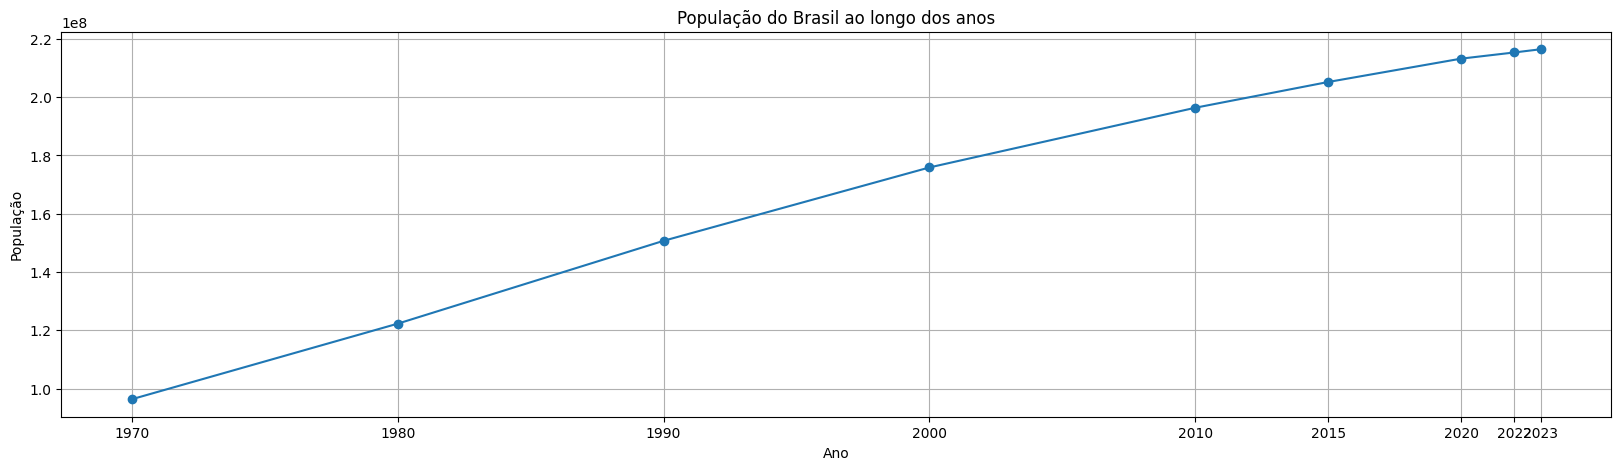

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(total_population_brasil_long['year'], total_population_brasil_long['total_population'], marker='o')
plt.title('População do Brasil ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('População')
plt.grid()
plt.xticks(total_population_brasil_long['year'])  # Definindo os ticks do eixo x para mostrar todos os anos
plt.show()

In [52]:
# 3. Treinamento do Modelo ARIMA
# Escolher a ordem do modelo (p,d,q) - Ex: (1,1,1)
model = ARIMA(total_population_brasil_long['total_population'], order=(2, 1, 2))
model_fit = model.fit()

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [53]:
# 4. Previsão dos Próximos Anos (ex: 5 anos)
forecast = model_fit.forecast(steps=5)
future_years = [2024, 2025, 2026, 2027, 2028]
forecast_df = pd.DataFrame({'year': future_years, 'predicted_population': forecast})
forecast_df.set_index('year', inplace=True)

forecast_df = forecast_df.astype(int)
display(forecast_df)

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_population
year,
2024,216031112
2025,215237497
2026,214419422
2027,213749801
2028,213276674


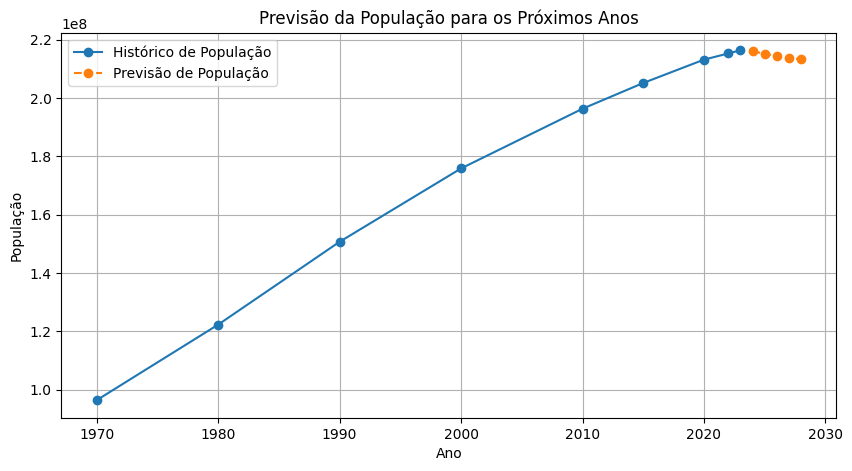

In [54]:
# Visualização dos Resultados
plt.figure(figsize=(10, 5))
plt.plot(total_population_brasil_long.set_index('year'), label='Histórico de População', marker='o')
plt.plot(forecast_df, label='Previsão de População', linestyle='--', marker='o')
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Previsão da População para os Próximos Anos')
plt.legend()
plt.grid()
plt.show()

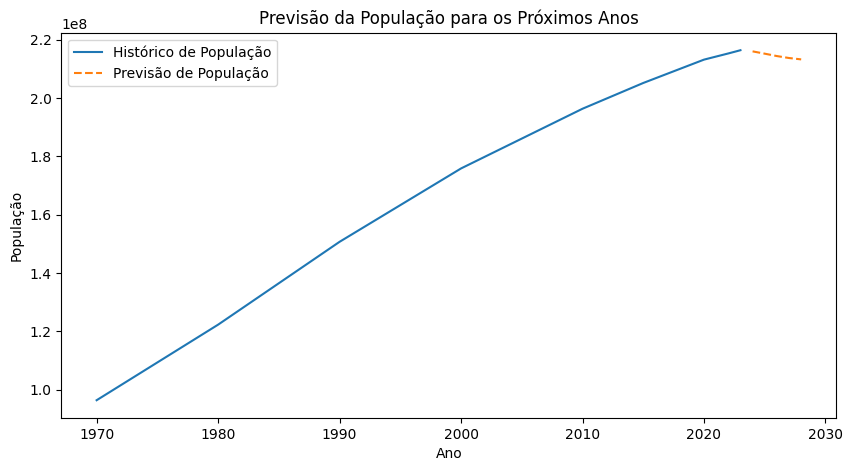

In [55]:
# Visualização das previsões
plt.figure(figsize=(10, 5))
plt.plot(total_population_brasil_long['year'], total_population_brasil_long['total_population'], label='Histórico de População')
plt.plot(forecast_df.index, forecast_df['predicted_population'], label='Previsão de População', linestyle='--')
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Previsão da População para os Próximos Anos')
plt.legend()
plt.show()